# Python Foundations Project: YorkHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company YorkHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset overview

### Question 1: Write the code to check the shape of the dataset and write your observations based on that

In [3]:
# delivery company dataset for new york city.
delivery = pd.read_csv("C:/Users/mamma/Downloads/Yorkhub_order.csv")
delivery.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Question 2: Write the observations based on the below output from the info() method.

In [5]:
# The dataset has 9 columns. No column contains null values. The dataset has columns with different data type.
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same.

In [294]:
# Changing the value type.
# When working with data, it is better to work with the 'category' type.
# Because it stores repeated values ​​as an object.
# As a result, memory usage is reduced and performance is improved.
# Also, the 'category' type is more convenient for conducting statistical analyses.
delivery["restaurant_name"] = delivery["restaurant_name"].astype("category")
delivery["cuisine_type"] = delivery["cuisine_type"].astype("category")
delivery["day_of_the_week"] = delivery["day_of_the_week"].astype("category")

### Question 4: Write the code to find the summary statistics and write your observations based on that.

In [7]:
# Using the describe() method, we can view the overall statistical status of the dataset.
delivery.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### Question 5: How many orders are not rated?

In [9]:
total_not_given = (delivery["rating"] == "Not given").sum()
print(f"A total of {total_not_given} orders were not rated in our dataset.")

A total of 736 orders were not rated in our dataset.


## *Exploratory Data Analysis (EDA)*

### Univariate Analysis

### Question 6: Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset.

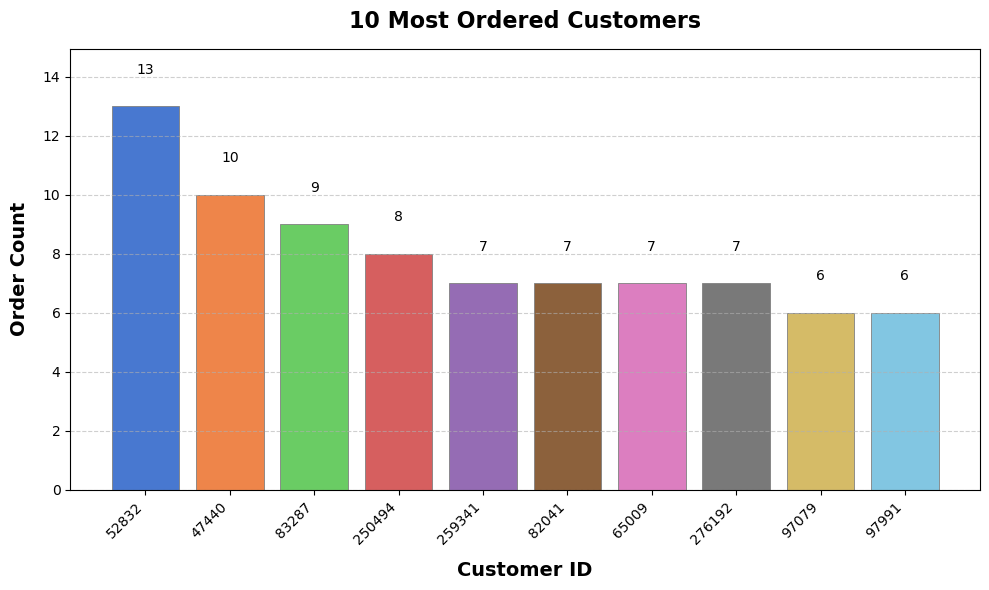

In [11]:
# # Certain filtering.
top_10_customer = delivery["customer_id"].value_counts().head(10).reset_index()
top_10_customer.columns = ["customer_id", "count"]

# Visual of the customers who made the most 10 orders.
colors = sns.color_palette("muted", len(top_10_customer))

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(top_10_customer["customer_id"].astype(str), top_10_customer["count"], color=colors, edgecolor="gray", linewidth=0.6)
ax.set_xlabel("Customer ID", fontsize=14, labelpad=10, fontweight="bold")
ax.set_ylabel("Order Count", fontsize=14, labelpad=10, fontweight="bold")
ax.set_title("10 Most Ordered Customers", fontsize=16, fontweight="bold", pad=15)
ax.set_ylim(0, top_10_customer["count"].max() * 1.15)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha="center", va="bottom", fontsize=10, color="black")

plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

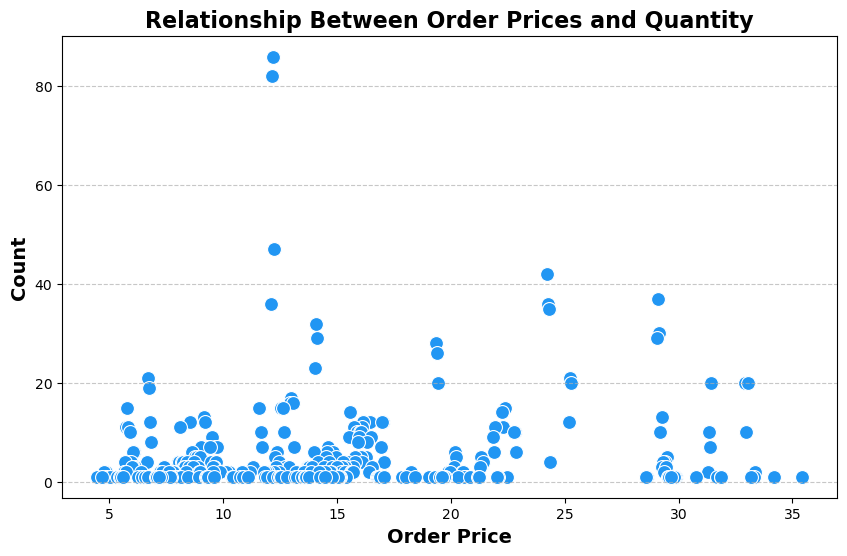

In [13]:
# Certain filtering.
price = delivery.groupby("cost_of_the_order")["cost_of_the_order"].count().reset_index(name="count")
price = price.sort_values("count", ascending=False)

# Visual showing the spread of orders by price.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=price, x="cost_of_the_order", y="count", color="#2196F3", s=100)
plt.xlabel("Order Price", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.title("Relationship Between Order Prices and Quantity", fontsize=16, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

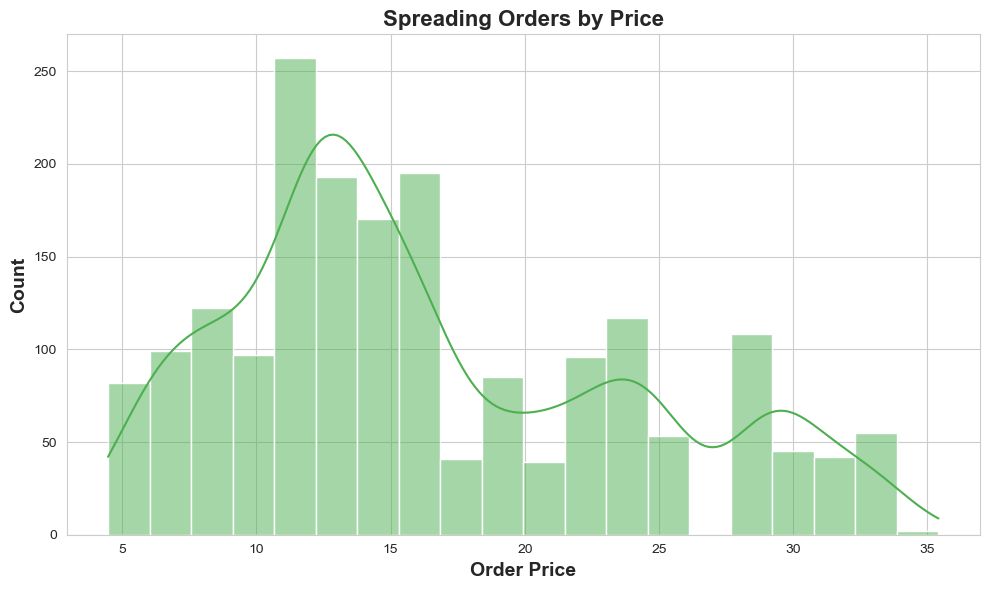

In [15]:
# Visual showing the spread of orders by price.
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(delivery["cost_of_the_order"], bins=20, kde=True, color="#4CAF50")

plt.xlabel("Order Price", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.title("Spreading Orders by Price", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

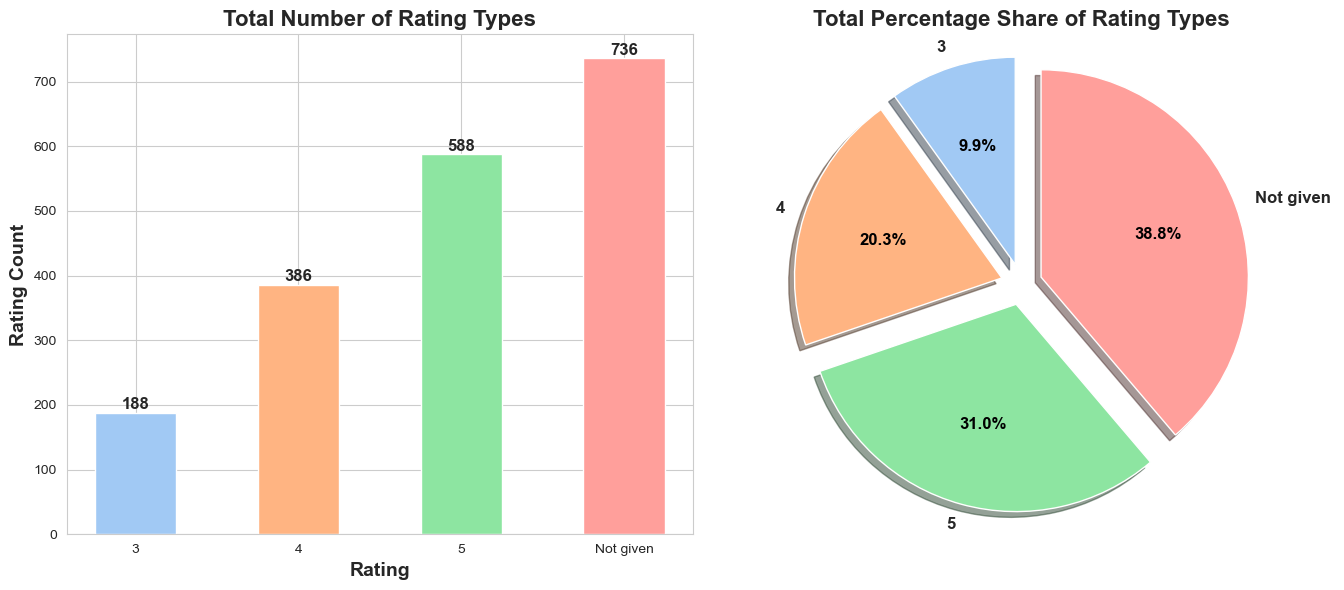

In [17]:
# Certain filtering.
total_rating = delivery.groupby("rating")["rating"].count().reset_index(name="count")

# Visual showing the total number of rating types and the percentage difference.
colors = sns.color_palette("pastel")

fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

bars1 = ax[0].bar(total_rating["rating"], total_rating["count"], color=colors[:len(total_rating)], width=0.5)
ax[0].set_xlabel("Rating", fontsize=14, fontweight="bold")
ax[0].set_ylabel("Rating Count", fontsize=14, fontweight="bold")
ax[0].set_title("Total Number of Rating Types", fontsize=16, fontweight="bold")

for bar in bars1:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha="center", va="bottom", fontsize=12, fontweight="bold")

wedges, texts, autotexts = ax[1].pie(
    total_rating["count"], 
    labels=total_rating["rating"], 
    autopct="%1.1f%%", 
    startangle=90, 
    colors=colors, 
    shadow=True, 
    explode=[0.1]*len(total_rating),
    textprops={"fontsize": 12, "weight": "bold"}
)

for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_weight("bold")

ax[1].set_title("Total Percentage Share of Rating Types", fontsize=16, fontweight="bold")
ax[1].axis("equal")

plt.tight_layout()
plt.show()

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders.

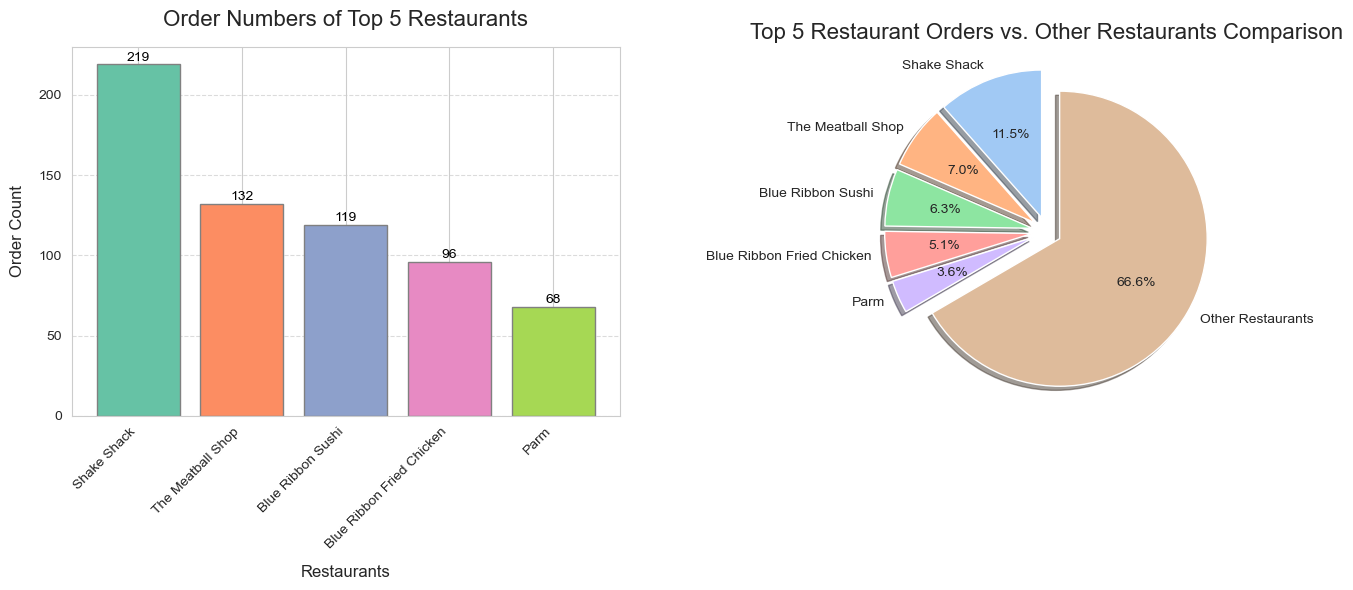

In [21]:
# Certain filtering.
top_5_restaurant = delivery["restaurant_name"].value_counts().head(5)
other_restaurants = delivery["restaurant_name"].value_counts().sum() - top_5_restaurant.sum()
data_bar = list(top_5_restaurant)
labels_bar = list(top_5_restaurant.index)

# Visual showing the percentage difference of the 5 most booked restaurants with other restaurants.
data_pie = list(top_5_restaurant) + [other_restaurants]
labels_pie = list(top_5_restaurant.index) + ["Other Restaurants"]
colors_bar = sns.color_palette("Set2", len(data_bar))
colors_pie = sns.color_palette("pastel", len(data_pie))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

bars = ax1.bar(labels_bar, data_bar, color=colors_bar, edgecolor="gray", linewidth=1)
ax1.set_xlabel("Restaurants", fontsize=12, labelpad=10)
ax1.set_ylabel("Order Count", fontsize=12, labelpad=10)
ax1.set_title("Order Numbers of Top 5 Restaurants", fontsize=16, pad=15)
plt.sca(ax1)
plt.xticks(rotation=45, ha="right")

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha="center", va="bottom", fontsize=10, color="black")

ax1.grid(axis="y", linestyle="--", alpha=0.7)

ax2.pie(data_pie, labels=labels_pie, autopct="%1.1f%%", startangle=90, colors=colors_pie, shadow=True, explode=[0.1]*len(labels_pie))
ax2.set_title("Top 5 Restaurant Orders vs. Other Restaurants Comparison", fontsize=16)
plt.tight_layout()
plt.show()

### Question 8: Write the code to find the most popular cuisine on weekends.

In [23]:
# Based on the overall analysis, America cuisine is the most ordered cuisine both on weekdays and weekends.
most_popular_cuisine = delivery[delivery["day_of_the_week"] == "Weekend"].groupby("cuisine_type", observed = "True").size().idxmax()
print(f"The most ordered cuisine at the weekend is {most_popular_cuisine}.")

The most ordered cuisine at the weekend is American.


### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?

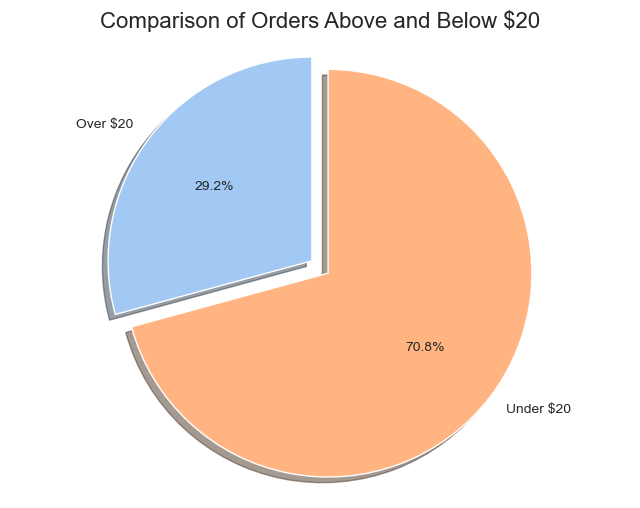

In [25]:
# Finding orders below and above $20.
total_orders = len(delivery)
cost_above_20 = delivery[delivery["cost_of_the_order"] > 20]
count_cost_above_20 = len(cost_above_20)
cost_below_or_equal_20 = total_orders - count_cost_above_20

percentage_below_or_equal_20 = round((cost_below_or_equal_20 / total_orders) * 100,2)
percentage_above_20 = round((count_cost_above_20 / total_orders) * 100, 2)

# Visual showing the percentage difference of orders above and below $20.
labels = ["Over $20", "Under $20"]
sizes = [percentage_above_20, percentage_below_or_equal_20]
colors = sns.color_palette("pastel")[0:2]
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Comparison of Orders Above and Below $20", fontsize=16)
plt.show()

### Question 10: Write the code to find the mean delivery time based on this dataset.

In [27]:
# Average delivery time.
avg_delivery_order = delivery["delivery_time"].mean().round(2)
print(f"Average delivery time is {avg_delivery_order} minutes")

Average delivery time is 24.16 minutes


### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details.

In [29]:
# The customer who placed the most expensive order.
max_cost_customer_details = delivery[(delivery["cost_of_the_order"]) == (delivery["cost_of_the_order"].max())]

print("Details of the customer who spends the maximum amount:")
max_cost_customer_details

Details of the customer who spends the maximum amount:


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


## Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset.

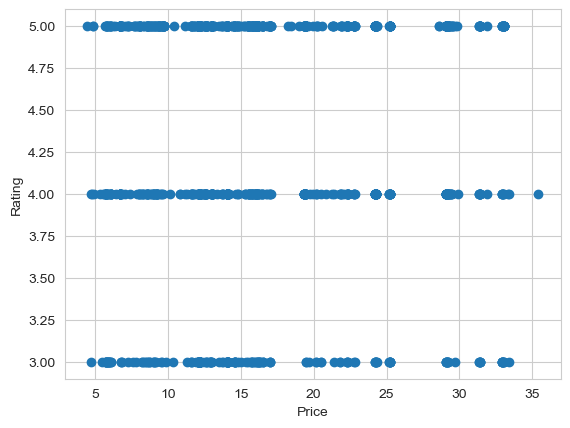

In [31]:
# Certain filtering.
delivery_1 = delivery[delivery["rating"] != "Not given"]
delivery_1.loc[:, "rating"] = delivery_1["rating"].astype("float")

# Visual showing the relationship between rating and price.
fig, ax = plt.subplots()

plt.scatter(delivery_1["cost_of_the_order"], delivery_1["rating"])
plt.xlabel("Price")
plt.ylabel("Rating")
plt.yticks(np.arange(3, delivery_1["rating"].max() + 0.25, 0.25))
plt.show()

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer.

In [33]:
# Restaurants with more than 50 orders and an average rating greater than 4.
delivery_rating = delivery[delivery["rating"] != "Not given"]

delivery_rating.loc[:, "rating"] = delivery_rating["rating"].astype("int")
delivery_rating.loc[:, "restaurant_name"] = delivery_rating["restaurant_name"].astype("object")

promotional_offers = (delivery_rating.groupby("restaurant_name").agg(rating_count=("rating", "count"), avg_rating=("rating", "mean")).query("rating_count > 50 and avg_rating > 4"))

promotional_offers

,rating_count,avg_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset.

In [35]:
# Calculation of income under certain conditions.
cost_above_20 = delivery[delivery["cost_of_the_order"] >= 20]
cost_above_5 = delivery[(delivery["cost_of_the_order"] >= 5) & (delivery["cost_of_the_order"] < 20)]

total_above_5 = cost_above_5["cost_of_the_order"].sum().round(2)
total_above_5 * 15 / 100

total_above_20 = cost_above_20["cost_of_the_order"].sum().round(2)
total_above_20 * 25 / 100

total_income = total_above_5 * 15 / 100 + total_above_20 * 25 / 100
print(f"Total income of the company: {total_income} dollars")

Total income of the company: 6166.303 dollars


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time.

Note: The total delivery time is the summation of the food preparation time and delivery time.

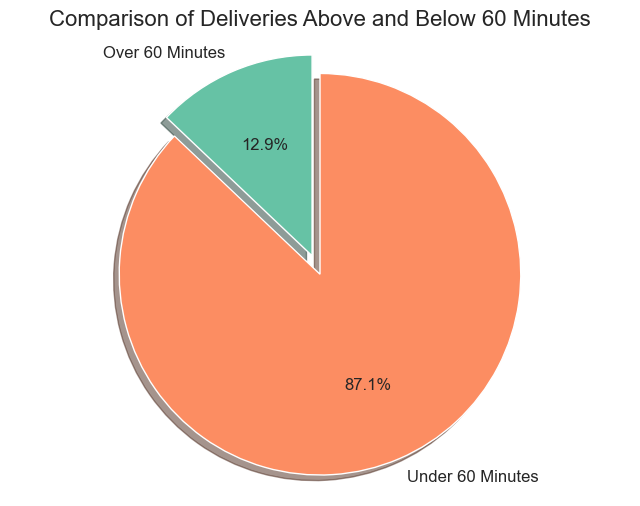

In [37]:
# Finding the delivery time of orders earlier and later than 60 minutes.
total_orders = len(delivery)
delivery["total_time"] = delivery["food_preparation_time"] + delivery["delivery_time"]
orders_above_60 = delivery[delivery["total_time"] >= 60]
count_above_60 = len(orders_above_60)
time_below_or_equal_60 = total_orders - count_above_60

percentage_below_or_equal_60 = round((time_below_or_equal_60 / total_orders) * 100, 2)
percentage_above_60 = round((count_above_60 / total_orders) * 100, 2)

# Visual showing the percentage difference between orders delivered 60 minutes earlier or later.
labels = ["Over 60 Minutes", "Under 60 Minutes"]
sizes = [percentage_above_60, percentage_below_or_equal_60]
colors = sns.color_palette("Set2")[0:2]
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90, textprops={"fontsize": 12})
plt.axis("equal")
plt.title("Comparison of Deliveries Above and Below 60 Minutes", fontsize=16)
plt.show()

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results.

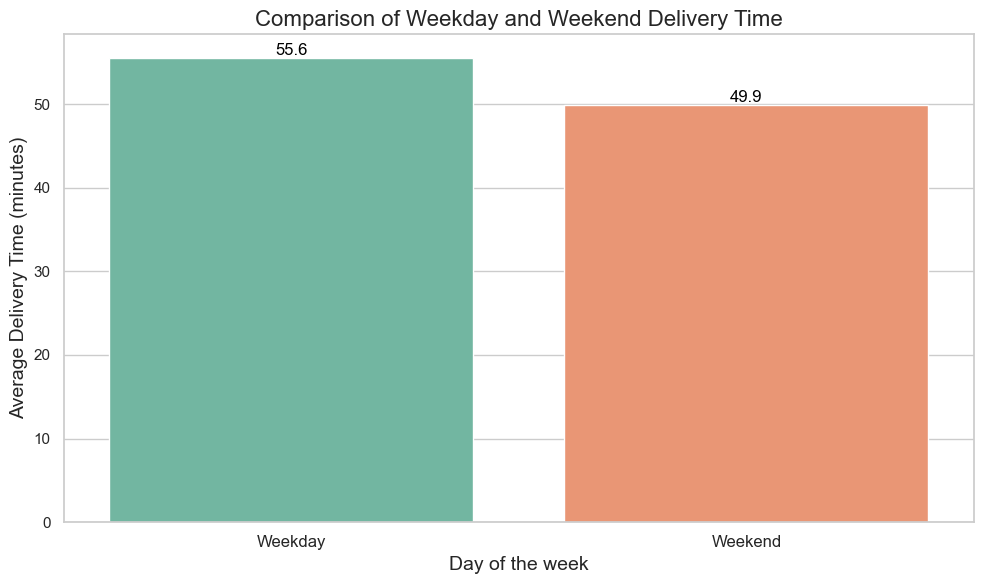

In [39]:
# Finding the average delivery time.
average_delivery_time = delivery.groupby("day_of_the_week")["total_time"].mean()

# Visual showing percentage difference in average delivery time.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

bar_plot = sns.barplot(x=average_delivery_time.index, y=average_delivery_time.values, palette="Set2", hue=average_delivery_time.index)
bar_plot.set_xticks(range(len(average_delivery_time.index)))
bar_plot.set_xticklabels(average_delivery_time.index, rotation=0, fontsize=12)

plt.xlabel("Day of the week", fontsize=14)
plt.ylabel("Average Delivery Time (minutes)", fontsize=14)
plt.title("Comparison of Weekday and Weekend Delivery Time", fontsize=16)

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha="center", va="bottom", fontsize=12, color="black")

plt.tight_layout()
plt.show()

## Conclusion and Recommendations

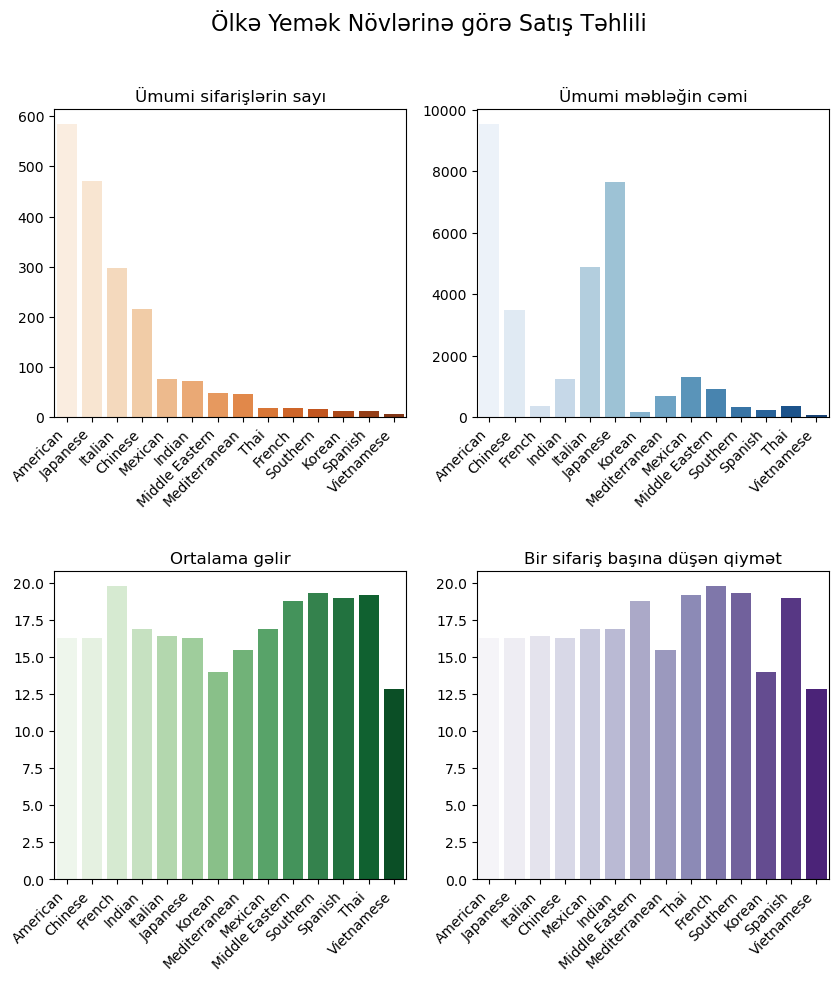

In [100]:
# Analysis of country food types.
cuisine = delivery["cuisine_type"].value_counts().reset_index()
cost = delivery.groupby("cuisine_type")["cost_of_the_order"].sum().reset_index()
merged = pd.merge(cuisine, cost, on="cuisine_type")
merged["price"] = round(merged["cost_of_the_order"] / merged["count"],2)
average_cost = delivery.groupby("cuisine_type")["cost_of_the_order"].mean().round(2).reset_index()

# Visual showing sales analysis.
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Sales Analysis by Country Food Types", fontsize=16)

sns.barplot(x="cuisine_type", y="count", data=cuisine, ax=ax[0][0], palette="Oranges", hue="cuisine_type", dodge=False)
ax[0][0].set_title("Number of total orders", fontsize=12)
ax[0][0].set_xticks(range(len(cuisine["cuisine_type"])))
ax[0][0].set_xticklabels(cuisine["cuisine_type"], rotation=45, ha="right")
ax[0][0].set_xlabel('')
ax[0][0].set_ylabel('')

sns.barplot(x="cuisine_type", y="cost_of_the_order", data=cost, ax=ax[0][1], palette="Blues", hue="cuisine_type", dodge=False)
ax[0][1].set_title("The sum of the total amount", fontsize=12)
ax[0][1].set_xticks(range(len(cost["cuisine_type"])))
ax[0][1].set_xticklabels(cost["cuisine_type"], rotation=45, ha="right")
ax[0][1].set_xlabel('')
ax[0][1].set_ylabel('')

sns.barplot(x="cuisine_type", y="cost_of_the_order", data=average_cost, ax=ax[1][0], palette="Greens", hue="cuisine_type", dodge=False)
ax[1][0].set_title("Average income", fontsize=12)
ax[1][0].set_xticks(range(len(average_cost["cuisine_type"])))
ax[1][0].set_xticklabels(average_cost["cuisine_type"], rotation=45, ha="right")
ax[1][0].set_xlabel('')
ax[1][0].set_ylabel('')

sns.barplot(x="cuisine_type", y="price", data=merged, ax=ax[1][1], palette="Purples", hue="cuisine_type", dodge=False)
ax[1][1].set_title("Price per order", fontsize=12)
ax[1][1].set_xticks(range(len(merged["cuisine_type"])))
ax[1][1].set_xticklabels(merged["cuisine_type"], rotation=45, ha="right")
ax[1][1].set_xlabel('')
ax[1][1].set_ylabel('')

plt.show()

In [23]:
# Adding a new column.
def tip(row):
    if row["rating"] == "5" and row["total_time"] < 60:
        return round(row["cost_of_the_order"] * 20 / 100,2)
    elif row["rating"] == "5" and row["total_time"] > 60:
        return round(row["cost_of_the_order"] * 15 / 100,2)
    elif row["rating"] == "4" and row["total_time"] < 60:
        return round(row["cost_of_the_order"] * 15 / 100, 2)
    elif row["rating"] == "4" and row["total_time"] > 60:
        return round(row["cost_of_the_order"] * 10 / 100,2)
    elif row["rating"] == "3" and row["total_time"] < 60:
        return round(row["cost_of_the_order"] * 10 / 100,2)
    elif row["rating"] == "3" and row["total_time"] > 60:
        return round(row["cost_of_the_order"] * 5 / 100,2)
    else:
        return "No tip"

delivery["tip"] = delivery.apply(tip, axis=1)

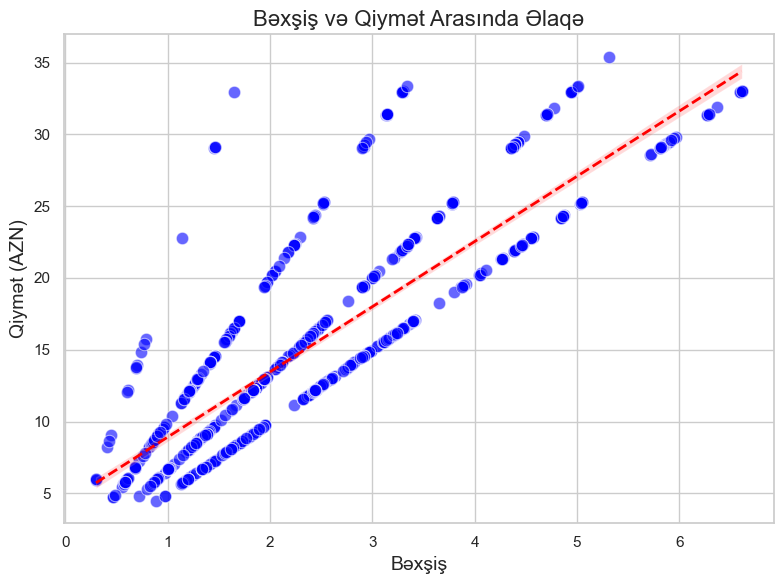

In [25]:
# Certain filtering.
delivery_1 = delivery[(delivery["rating"] != "Not given") & (delivery["tip"] != "No tip")].copy()
delivery_1["tip"] = pd.to_numeric(delivery_1["tip"], errors="coerce")
delivery_1["cost_of_the_order"] = pd.to_numeric(delivery_1["cost_of_the_order"], errors='coerce')
delivery_1 = delivery_1.dropna(subset=["tip", "cost_of_the_order"])

# Visual showing the relationship between the tip and the price.
plt.figure(figsize=(8, 6))

sns.scatterplot(data=delivery_1, x="tip", y="cost_of_the_order", color="blue", alpha=0.6, s=80, edgecolor="w")
sns.regplot(data=delivery_1, x="tip", y="cost_of_the_order", scatter=False, color="red", line_kws={"linewidth": 2, "linestyle": "--"})

plt.xlabel("Tip", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Relationship Between Tip and Price", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

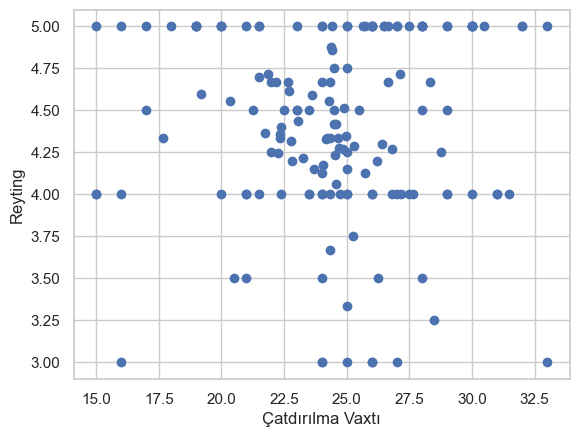

In [35]:
# Certain filtering.
delivery_2 = delivery[delivery["rating"] != "Not given"]
delivery_2.loc[:, "rating"] = delivery_2["rating"].astype("int64")
total_time_delivery = delivery_2.groupby("restaurant_name")["rating"].mean().round(2)
total_time_delivery_1 = delivery_2.groupby("restaurant_name")["delivery_time"].mean()
total_merged = pd.merge(total_time_delivery, total_time_delivery_1, on="restaurant_name")

# Visual showing the relationship between the rating and the price.
fig, ax = plt.subplots()
plt.scatter(total_merged["delivery_time"], total_merged["rating"])
plt.xlabel("Delivery Time")
plt.ylabel("Rating")
plt.show()

## Brief Information.

#### I have done some additional different analysis here. Here I have created a "tip" column based on certain conditions. With this we can check the relationship between price and gift, rating and gift, delivery time and gift. I also made some calculations according to the type of kitchen. In addition, I have done some analysis to find out the effect of delivery time on rating or price. Based on these and other calculations and analyses, I prepared proposals that could be useful for the development of the company.

### **Question 17:** Write the conclusions and business recommendations derived from the analysis.

#### Based on the analysis, I've prepared some suggestions. First, it's essential to understand if the low ratings are due to the food itself or issues with delivery. To achieve this, we should create a feedback column and encourage customers to leave feedback. Additionally, we could conduct a survey through the app to understand the reasons behind low ratings, which would help us take the necessary steps.
#### Another recommendation is to improve the delivery process. Currently, the average time for food preparation and delivery is 51 minutes, with 24 minutes dedicated solely to delivery. By taking certain measures to reduce this time, we can achieve more deliveries with fewer staff.
#### The analysis also indicates that the number of orders on weekdays is lower than on weekends. To increase weekday orders, we could introduce promotional campaigns.
#### We could offer special deals to customers who reach a certain number of orders each month, which would encourage them to order more consistently.
#### As the analysis shows, although some dishes have lower sales volume, they generate higher revenue per unit compared to more popular dishes. To increase revenue, we can show this type of food more prominently.
#### From the analysis and graphs above, we can see that 70% of the orders are below $20. Therefore, we can encourage customers to place higher value orders by launching special campaigns. This approach will not only increase revenue, but also allow couriers to earn higher tip, as tips are positively correlated with higher order amounts.

##### Note: Detailed information will be given in the power point presentation.